In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
# pip install mglearn
import mglearn
from sklearn.datasets import load_breast_cancer, load_boston

# 1. 샘플 소개

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, '두번째 특성')

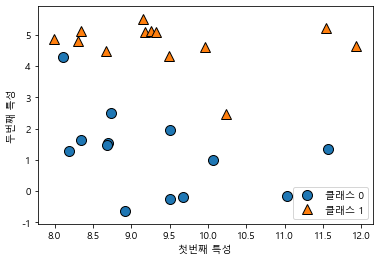

In [9]:
# 이진 분류용 데이터셋

X, y = mglearn.datasets.make_forge()
# print(X)
# print(y)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫번째 특성")
plt.ylabel("두번째 특성")

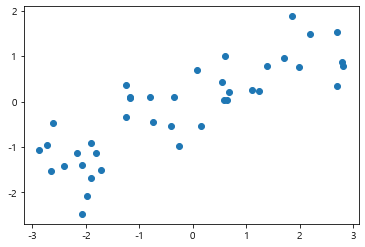

In [14]:
# 선형 회귀용 샘플

X, y = mglearn.datasets.make_wave(n_samples=40)
# print(X, y)

plt.plot(X, y, 'o')
plt.xlabel("특성")
plt.ylabel("타겟")

In [26]:
cancer = load_breast_cancer()
# print(cancer)
print(cancer.keys())
cancer.data
cancer.target
# print(cancer.DESCR)
type(cancer)
cancer.data.shape

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


(569, 30)

In [28]:
boston = load_boston()
boston.data.shape
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

---

# 2. 용어 정리

#### (1) 과대 적합

- 훈련 데이터셋의 각 샘플에 너무 가깝게 맞춰져 있어서 복잡한 모델을 만들게 되는 것


#### (2) 과소 적합

- 너무 간단한 모델이 선택되는 것

#### (3) 일반화

- 처음 보는 데이터에 대해서 정확하게 예측할 수 있는 것

---

# 3. KNN ( K - Nearest Neighbors)

#### (1) 특징

+ 이해하기 쉽고 직관적인 모델
+ 더 복잡한 알고리즘을 적용하기 전에 시도해 볼 수 있는 알고리즘
+ 훈련셋이 너무 크면 예측이 느려진다.

#### (2) 파라미터(하이퍼 파라미터)

+ 이웃의 갯수(K)
+ 데이터 사이의 거리를 재는 방법 : L2 norm

C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


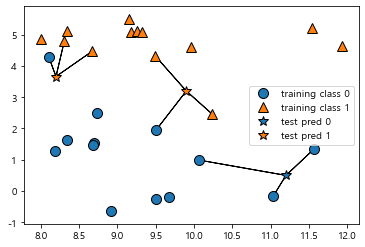

In [30]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

---

#### (3) L1 norm, L2 norm

+ L1 norm
    - 단순한 거리의 절대값의 합
    - 맨하탄 거리
    
    
    
+ L2 norm
    - 거리의 절대값의 합에 루트 적용
    - 피타고라스 정리, 유클리드 거리

In [31]:
df = pd.DataFrame(np.random.randint(low=1, high=10, size=(3, 2)))
df.columns = ["x", "y"]
df

,x,y
0,6,7
1,3,8
2,9,1


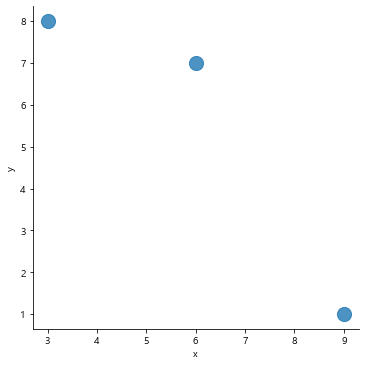

In [34]:
sns.lmplot('x', 'y', data=df, fit_reg=False, scatter_kws={"s":200})

In [36]:
##### (0, 0)으로 부터 어디가 제일 가까울까?
# 데이터의 최단 거리를 구하는 것이기 때문에 L2 norm 을 사용한다.
from numpy import linalg

dt_point = df.values
dt_point

linalg.norm(dt_point, ord=2, axis=1)

array([9.21954446, 8.54400375, 9.05538514])

In [38]:
##### 3명이 주사위를 3번 던진 후 걸음 수 측정
df = pd.DataFrame(np.random.randint(low=-3, high=3, size=(3, 3)))
df.columns = ["move_1", "move_1", "move_3"]
df

,move_1,move_1,move_3
0,-1,0,1
1,1,-2,-1
2,-3,-2,0


In [39]:
##### 누가 가장 많이 걸었을까?
# 데이터의 거리 합을 구하는 것이기 때문에 L1 norm을 사용한다.

linalg.norm(df.values, ord=1, axis=1)

array([2., 4., 5.])

---

#### (4) KNN 구현

In [3]:
X, y = mglearn.datasets.make_forge()
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(26, 2)
(19, 2) (7, 2) (19,) (7,)


C:\Users\acorn\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [4]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [10]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

In [12]:
clf.score(X_test, y_test)

0.8571428571428571

#### (5) KNN 분석

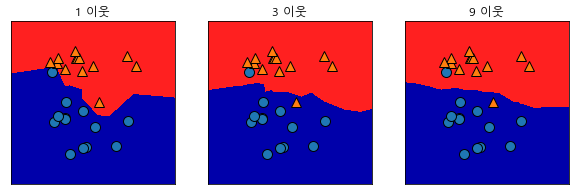

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
# axes

# clf = KNeighborsClassifier(n_neighbors=1).fit(X, y)
# mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[0])
# mglearn.plots.plot_2d_separator(clf, X, ax=axes[0], fill=True)

# clf = KNeighborsClassifier(n_neighbors=3).fit(X, y)
# mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[1])
# mglearn.plots.plot_2d_separator(clf, X, ax=axes[1], fill=True)

# clf = KNeighborsClassifier(n_neighbors=9).fit(X, y)
# mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=axes[2])
# mglearn.plots.plot_2d_separator(clf, X, ax=axes[2], fill=True)

for n, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X, y)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    mglearn.plots.plot_2d_separator(clf, X, ax=ax, fill=True)
    
    ax.set_title("{} 이웃".format(n))

##### 1) 유방암 데이터셋으로 확인

In [22]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [35]:
# clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

In [36]:
clf.score(X_train, y_train)

0.9389671361502347

In [37]:
clf.score(X_test, y_test)

0.9370629370629371

In [39]:
##### 가장 적합한 하이퍼 파라미터 선정

train_acc = []
test_acc = []

for n in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    
    train_acc.append(clf.score(X_train, y_train))
    test_acc.append(clf.score(X_test, y_test))

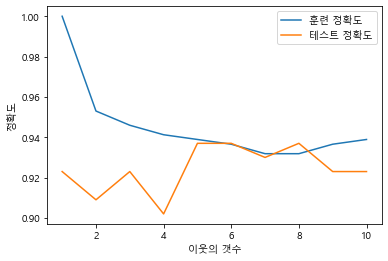

In [42]:
plt.plot(range(1, 11), train_acc, label="훈련 정확도")
plt.plot(range(1, 11), test_acc, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("이웃의 갯수")
plt.legend()

In [44]:
test_acc[5]

0.9370629370629371

#### (6) 회귀분석을 위한 KNN

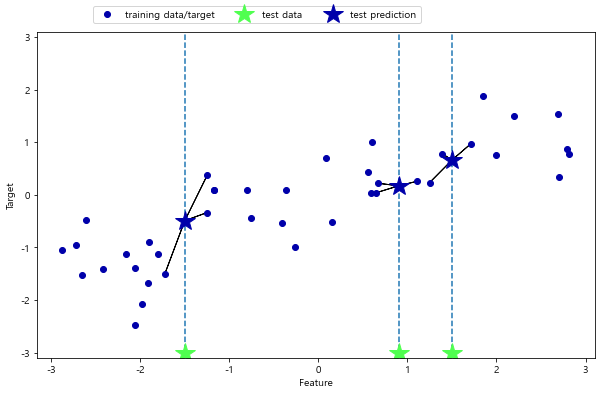

In [46]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [47]:
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(30, 1) (10, 1) (30,) (10,)


In [48]:
from sklearn.neighbors import KNeighborsRegressor

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [49]:
print("설명 계수(R^2) : ", reg.score(X_test, y_test))

설명 계수(R^2) :  0.8344172446249605


In [51]:
X_test, y_test

(array([[-1.24713211],
        [ 0.67111737],
        [ 1.71105577],
        [-2.06388816],
        [-2.87649303],
        [-1.89957294],
        [ 0.55448741],
        [ 2.81945911],
        [-0.40832989],
        [-2.72129752]]),
 array([ 0.37299129,  0.21778193,  0.96695428, -1.38773632, -1.05979555,
        -0.90496988,  0.43655826,  0.7789638 , -0.54114599, -0.95652133]))

In [53]:
# reg.predict([[-1.24713211]])
reg.predict(X_test)

array([-0.05396539,  0.35686046,  1.13671923, -1.89415682, -1.13881398,
       -1.63113382,  0.35686046,  0.91241374, -0.44680446, -1.13881398])

In [54]:
y_test

array([ 0.37299129,  0.21778193,  0.96695428, -1.38773632, -1.05979555,
       -0.90496988,  0.43655826,  0.7789638 , -0.54114599, -0.95652133])

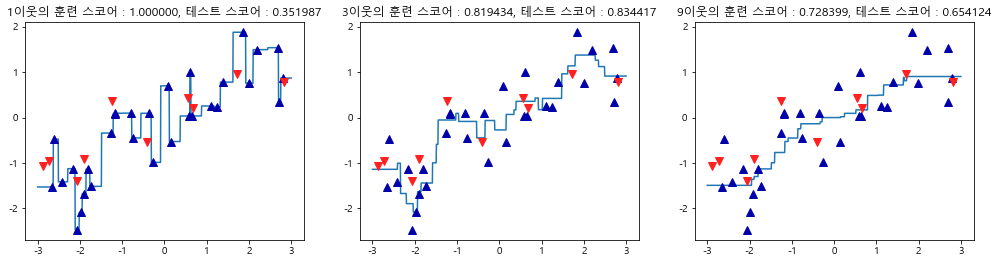

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(17, 4))

line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, "v", c=mglearn.cm2(1), markersize=8)
    
    ax.set_title("{0}이웃의 훈련 스코어 : {1:2f}, 테스트 스코어 : {2:2f}".format(n, 
                                                                   reg.score(X_train, y_train),
                                                                  reg.score(X_test, y_test)))

---
#### (7) 붓꽃 데이터를 이용한 응용 예제

In [77]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())
print(iris.target_names)
print(iris.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [78]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(112, 4) (38, 4) (112,) (38,)


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

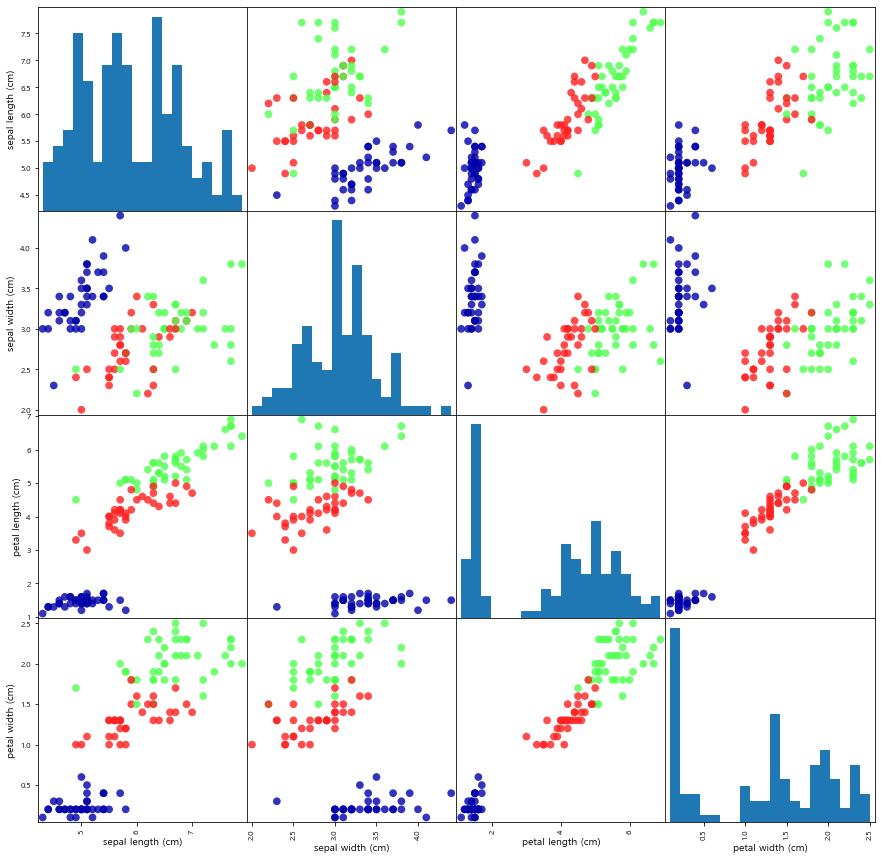

In [87]:
##### 그래프로 시각화

iris_df = pd.DataFrame(X_train, columns=iris.feature_names)
iris_df

pd.plotting.scatter_matrix(iris_df, figsize=(15, 15), c=y_train, s=60, marker="o",
                          cmap=mglearn.cm3, hist_kwds={"bins":20}, alpha=.8)

In [88]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

In [90]:
print(knn.score(X_test, y_test))

pred = knn.predict(X_test)
print(np.mean(pred == y_test))

0.9736842105263158
0.9736842105263158


In [97]:
# 꽃받침(Sepal)의 길이가 5cm, 폭은 2.9cm, 꽃잎(Petal)의 길이는 1cm, 폭은 0.2cm 인 붓꽃의 품종은?
s_h = 5.0
s_w = 2.9
p_h = 1.0
p_w = 0.2

pred = knn.predict([[s_h, s_w, p_h, p_w]])
print("붓꽃의 품종은 ? ", iris.target_names[pred])

붓꽃의 품종은 ?  ['setosa']


#### (8) 영화 분류 프로그램 만들기

In [127]:
import operator

def createDataSet():
    group = np.array([[1.0, 2.0], [1.0, 4.0], [4.0, 1.0], [4.0, 2.0]])
    label = ["Action", "Action", "Romance", "Romance"]
    return group, label

def calcDistance(X_new, data):
    # 데이터의 갯수
    # dataSize = len(data) 또는
    dataSize = data.shape[0]
    
    # 새로 입력된 데이터와 기존 데이터의 차이 값
    diffMat = np.tile(X_new, (dataSize, 1)) - data
    
    # L2 norm
    sqDiffMat = diffMat**2
    distance = (sqDiffMat.sum(axis=1))**0.5
    return distance.argsort()

def findMajorityClass(sortedDistance, target, k):
    classCount = {}
    
    for i in range(k):
        voteLabel = target[sortedDistance[i]]
        classCount[voteLabel] = classCount.get(voteLabel, 0) + 1
        
    return sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)

def classify(X_new, data, target, k):
    # 거리 측정
    sortedDistance = calcDistance(X_new, data)
    
    # 이웃의 갯수로 묶어 해당 클래스 분류
    result = findMajorityClass(sortedDistance, target, k)
    return result
    

In [129]:
X, y = createDataSet()
result = classify([2.0, 3.0], X, y, 3)
print("결과는 {} 영화이다.".format(result[0][0]))

결과는 Action 영화이다.


In [110]:
np.tile([[0, 1], [2, 3]], (2, 3))

array([[0, 1, 0, 1, 0, 1],
       [2, 3, 2, 3, 2, 3],
       [0, 1, 0, 1, 0, 1],
       [2, 3, 2, 3, 2, 3]])

---
# 4. 검증(Validation)

#### (1) 훈련용(학습용) 데이터 와 테스트용 데이터의 분리

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

In [6]:
# 훈련용 데이터 분리
X_train = iris.data[:-30]
y_train = iris.target[:-30]
print(X_train.shape, y_train.shape)

# 테스트용 데이터 분리
X_test = iris.data[-30:]
y_test = iris.target[-30:]
print(X_test.shape, y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [8]:
from sklearn.model_selection import train_test_split

"""
1. test_size : 디폴트는 0.25(25%)
2. train_size : 학습용 데이터를 샘플링
3. shuffle : 데이터를 섞어준다. 디폴트로 True
4. random_state : 난수값 고정
"""
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0,
                                                   test_size=0.3, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(105, 4) (45, 4) (105,) (45,)


#### (2) Cross Validation

+ K fold 방식

In [9]:
from sklearn.model_selection import KFold

In [11]:
kfold = KFold(n_splits=5)
list(kfold.split(iris.data))

[(array([ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,  42,
          43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
          69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
          82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
          95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
         108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
         121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
         134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
         147, 148, 149]),
  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])),
 (array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
          13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
          26,  27, 

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=3)

cv_accuracy = []
cnt = 0

for train_index, test_index in kfold.split(iris.data):
    # print("훈련용:", train_index)
    # print("테스트용:", test_index)
    X_train, X_test = iris.data[train_index], iris.data[test_index]
    y_train, y_test = iris.target[train_index], iris.target[test_index]
    # print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    
    # 학습 및 예측
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    cnt = cnt + 1
    
    # 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    print("\n#{0} 교차 검증 정확도 : {1}, 학습 데이터 크기:{2}, 검증 데이터 크기 :{3}".format(cnt, 
                                                                        accuracy, X_train.shape[0],
                                                                        X_test.shape[0]))
    print("#{0} 검증 셋 인덱스 : {1}".format(cnt, test_index))
    cv_accuracy.append(accuracy)
    
print("\n ### 평균 검증 정확도 : ", np.mean(cv_accuracy))


#1 교차 검증 정확도 : 1.0, 학습 데이터 크기:120, 검증 데이터 크기 :30
#1 검증 셋 인덱스 : [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 : 1.0, 학습 데이터 크기:120, 검증 데이터 크기 :30
#2 검증 셋 인덱스 : [30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 : 0.8333, 학습 데이터 크기:120, 검증 데이터 크기 :30
#3 검증 셋 인덱스 : [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 : 0.9333, 학습 데이터 크기:120, 검증 데이터 크기 :30
#4 검증 셋 인덱스 : [ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 : 0.7667, 학습 데이터 크기:120, 검증 데이터 크기 :30
#5 검증 셋 인덱스 : [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

 ### 평균 검증 정확도 :  0.9066599999999999


+ Stratified K 폴드
    - 데이터의 갯수가 불균형할때

In [23]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df

iris_df["label"] = iris.target
iris_df

iris_df["label"].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [25]:
kfold = KFold(n_splits=3)
cnt = 0

for train_index, test_index in kfold.split(iris_df):
    cnt += 1
    label_train = iris_df["label"].iloc[train_index]
    label_test = iris_df["label"].iloc[test_index]
    print("## 교차검증 : {0}".format(cnt))
    print("학습 레이블 데이터 분포:\n", label_train.value_counts())
    print("검증 레이블 데이터 분포:\n", label_test.value_counts())

## 교차검증 : 1
학습 레이블 데이터 분포:
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차검증 : 2
학습 레이블 데이터 분포:
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차검증 : 3
학습 레이블 데이터 분포:
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


In [27]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=3)
cnt = 0

for train_index, test_index in kfold.split(iris_df, iris_df["label"]):
    cnt += 1
    label_train = iris_df["label"].iloc[train_index]
    label_test = iris_df["label"].iloc[test_index]
    print("## 교차검증 : {0}".format(cnt))
    print("학습 레이블 데이터 분포:\n", label_train.value_counts())
    print("검증 레이블 데이터 분포:\n", label_test.value_counts())

## 교차검증 : 1
학습 레이블 데이터 분포:
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
0    17
2    16
Name: label, dtype: int64
## 교차검증 : 2
학습 레이블 데이터 분포:
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
0    17
1    16
Name: label, dtype: int64
## 교차검증 : 3
학습 레이블 데이터 분포:
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    16
Name: label, dtype: int64


+ cross_val_score(), cross_validate() : 교차 검증을 훨씬 간단하게 구현

In [29]:
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, iris.data, iris.target, scoring="accuracy", cv=5)

print("교차 검증별 정확도 : ", np.round(scores, 4))
print("평균 검증 정확도 : ", np.round(np.mean(scores), 4))

교차 검증별 정확도 :  [0.9667 0.9667 0.9333 0.9667 1.    ]
평균 검증 정확도 :  0.9667


#### (3) GridSearchCV

+ 교차 검증과 최적 하이퍼 파라미터 튜닝을 한번에 처리

+ 파라미터
    - estimator : classifier, regressor, pipeline 이 사용될 수 있다.
    - param_grid : key + 리스트값을 가지는 dict
    - scoring : 평가 지표
    - cv : 교차 검증을 위해 분할되는 학습/테스트 셋의 갯수를 지정
    - refit : 디폴트가 True, 최적의 하이퍼 파라미터를 찾은 뒤 재학습 여부

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
from sklearn.datasets import load_iris
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=121,
                                                   test_size=0.2)
knn = KNeighborsClassifier()

In [32]:
params = {"n_neighbors":[n for n in range(1, 15)]}

grid_knn = GridSearchCV(knn, param_grid=params, cv=3, refit=True)
grid_knn.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14]})

In [34]:
scores_df = pd.DataFrame(grid_knn.cv_results_)
scores_df[["params", "mean_test_score", "rank_test_score", "split0_test_score", "split1_test_score",
          "split2_test_score"]]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,{'n_neighbors': 1},0.966667,6,0.950,1.000,0.950
1,{'n_neighbors': 2},0.933333,14,0.925,0.950,0.925
2,{'n_neighbors': 3},0.966667,6,0.950,1.000,0.950
3,{'n_neighbors': 4},0.958333,10,0.925,1.000,0.950
4,{'n_neighbors': 5},0.975000,1,0.950,1.000,0.975
5,{'n_neighbors': 6},0.958333,10,0.925,0.975,0.975
6,{'n_neighbors': 7},0.975000,1,0.950,1.000,0.975
7,{'n_neighbors': 8},0.950000,13,0.925,0.950,0.975
8,{'n_neighbors': 9},0.966667,6,0.950,0.975,0.975
9,{'n_neighbors': 10},0.958333,10,0.950,0.950,0.975


In [36]:
print("최적의 파라미터 : ", grid_knn.best_params_)
print("최고 정확도 : ", grid_knn.best_score_)

최적의 파라미터 :  {'n_neighbors': 5}
최고 정확도 :  0.975


In [37]:
pred = grid_knn.predict(X_test)
print("테스트 정확도 : ", accuracy_score(y_test, pred))

테스트 정확도 :  0.9666666666666667


---
# 5. 전처리

+ 결측치 허용 안됨
+ 문자열 허용 안됨

#### (1) 문자열 해결을 위한 데이터 인코딩
    
+ 레이블 인코딩
+ 원-핫 인코딩

##### 1) 레이블 인코딩 : 카테고리 피처를 코드형 숫자값으로 변환

In [38]:
from sklearn.preprocessing import LabelEncoder

In [44]:
items = ["TV", "냉장고", "전자렌지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print("인코딩 변환값 : ", labels)
print("인코딩 클래스 : ", encoder.classes_)
print("디코딩 원본값 : ", encoder.inverse_transform([0, 1, 4, 5, 3, 3, 2, 2]))

인코딩 변환값 :  [0 1 4 5 3 3 2 2]
인코딩 클래스 :  ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']
디코딩 원본값 :  ['TV' '냉장고' '전자렌지' '컴퓨터' '선풍기' '선풍기' '믹서' '믹서']


##### 2) 원-핫 인코딩

+ 새로운 피처를 추가해 고유 값에 해당하는 컬럼에만 1을 표시하고 나머지는 0으로 표시
+ 사전에 반드시 숫자로 변환이 되어 있어야 한다.
+ 입력값으로 2차원 데이터가 필요하다.

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
items = ["TV", "냉장고", "전자렌지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# 2차원 배열로 변환
labels = labels.reshape(-1, 1)

# 원-핫 인코딩 사용
one = OneHotEncoder()
one.fit(labels)
oh = one.transform(labels)

print("원-핫 인코딩 데이터")
print(oh.toarray())
print("크기 : ", oh.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
크기 :  (8, 6)


##### 3) get_dummies()

In [51]:
df = pd.DataFrame({"item":["TV", "냉장고", "전자렌지", "컴퓨터", "선풍기", "선풍기", "믹서", "믹서"]})
df

pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


#### (2) Feature Scaling

+ 표준화 : (Xi - mean(X)) / sd(X)
+ 정규화 : (Xi - mean(X)) / max(X) - min(X)

##### 1) StandardScaler

In [57]:
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

print("feature들의 평균 :\n", df.mean())
print("---------------------------------------")
print("feature들의 분산 :\n", df.var())


feature들의 평균 :
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
---------------------------------------
feature들의 분산 :
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()
scaler.fit(df)
iris_scaled = scaler.transform(df)

In [62]:
df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print("feature들의 평균 :\n", df_scaled.mean())
print("---------------------------------------")
print("feature들의 분산 :\n", df_scaled.var())

feature들의 평균 :
 sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64
---------------------------------------
feature들의 분산 :
 sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


##### 2) MinMaxScaler

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
scaler = MinMaxScaler()

scaler.fit(df)
iris_scaled = scaler.transform(df)

In [65]:
df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)

print("feature들의 최소값")
print(df_scaled.min())
print("-----------------------------------")
print("feature들의 최대값")
print(df_scaled.max())

feature들의 최소값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64
-----------------------------------
feature들의 최대값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


##### 3) Scaling할 때 주의할 점

In [67]:
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6).reshape(-1, 1)

In [71]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print("원본 : ", train_array.reshape(-1))
print("스케일 : ", train_scaled.reshape(-1))

print("---------------------------------------------------")

scaler.fit(test_array)
test_scaled = scaler.transform(test_array)

print("원본 : ", test_array.reshape(-1))
print("스케일 : ", test_scaled.reshape(-1))

원본 :  [ 0  1  2  3  4  5  6  7  8  9 10]
스케일 :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
---------------------------------------------------
원본 :  [0 1 2 3 4 5]
스케일 :  [0.  0.2 0.4 0.6 0.8 1. ]


In [72]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)

print("원본 : ", train_array.reshape(-1))
print("스케일 : ", train_scaled.reshape(-1))

print("---------------------------------------------------")

test_scaled = scaler.transform(test_array)

print("원본 : ", test_array.reshape(-1))
print("스케일 : ", test_scaled.reshape(-1))

원본 :  [ 0  1  2  3  4  5  6  7  8  9 10]
스케일 :  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
---------------------------------------------------
원본 :  [0 1 2 3 4 5]
스케일 :  [0.  0.1 0.2 0.3 0.4 0.5]
